In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
path = "C:/Users/Ansari Aaquib/Downloads/Clustering/Dataset/teenagemkt.csv"

In [4]:
data = pd.read_csv(path)

In [5]:
print(data)

          age  friends  basketball  football  soccer  softball  volleyball  \
0      18.982        7           0         0       0         0           0   
1      18.801        0           0         1       0         0           0   
2      18.335       69           0         1       0         0           0   
3      18.875        0           0         0       0         0           0   
4      18.995       10           0         0       0         0           0   
...       ...      ...         ...       ...     ...       ...         ...   
29995  16.115        0           0         0       0         0           0   
29996  15.792        1           0         1       0         0           0   
29997  15.784        0           0         1       0         0           0   
29998  16.378        0           0         0       0         0           0   
29999  18.724        3           2         0       0         1           0   

       swimming  cheerleading  baseball  ...  blonde  mall  sho

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           24914 non-null  float64
 1   friends       30000 non-null  int64  
 2   basketball    30000 non-null  int64  
 3   football      30000 non-null  int64  
 4   soccer        30000 non-null  int64  
 5   softball      30000 non-null  int64  
 6   volleyball    30000 non-null  int64  
 7   swimming      30000 non-null  int64  
 8   cheerleading  30000 non-null  int64  
 9   baseball      30000 non-null  int64  
 10  tennis        30000 non-null  int64  
 11  sports        30000 non-null  int64  
 12  cute          30000 non-null  int64  
 13  sex           30000 non-null  int64  
 14  sexy          30000 non-null  int64  
 15  hot           30000 non-null  int64  
 16  kissed        30000 non-null  int64  
 17  dance         30000 non-null  int64  
 18  band          30000 non-nu

In [7]:
data.isnull().sum()

age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

impute the null values


In [8]:
data.describe()['age']

count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

In [11]:
len(data[(data.age >= 13) & (data.age <=20)])

24477

In [13]:
teenage = data.age[(data.age >=13)&(data.age <=20)].describe()

In [14]:
min_age = teenage['min']
max_age = teenage['max']

In [15]:
print(min_age,max_age)

13.027 19.995


In [16]:
ndx_null_age = data.age[data.age.isnull()].index

In [17]:
len(ndx_null_age)

5086

In [18]:
data.age[ndx_null_age] = np.round(np.random.uniform(min_age,max_age,len(ndx_null_age)),3)

<ipython-input-18-54a5b11003e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[ndx_null_age] = np.round(np.random.uniform(min_age,max_age,len(ndx_null_age)),3)


In [20]:
data.age.isnull().sum()

0

In [21]:
data.age[ndx_null_age]

5        19.230
13       16.106
15       17.484
16       14.377
26       16.083
          ...  
29980    17.296
29989    14.127
29991    14.516
29992    18.183
29993    16.885
Name: age, Length: 5086, dtype: float64

In [22]:
teendata = data[(data.age >=13) &  (data.age <=20)]

In [23]:
len(teendata)

29563

In [24]:
len(data)

30000

In [25]:
30000 - 29563

437

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'friends'}>,
        <AxesSubplot:title={'center':'basketball'}>,
        <AxesSubplot:title={'center':'football'}>,
        <AxesSubplot:title={'center':'soccer'}>,
        <AxesSubplot:title={'center':'softball'}>],
       [<AxesSubplot:title={'center':'volleyball'}>,
        <AxesSubplot:title={'center':'swimming'}>,
        <AxesSubplot:title={'center':'cheerleading'}>,
        <AxesSubplot:title={'center':'baseball'}>,
        <AxesSubplot:title={'center':'tennis'}>,
        <AxesSubplot:title={'center':'sports'}>],
       [<AxesSubplot:title={'center':'cute'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'sexy'}>,
        <AxesSubplot:title={'center':'hot'}>,
        <AxesSubplot:title={'center':'kissed'}>,
        <AxesSubplot:title={'center':'dance'}>],
       [<AxesSubplot:title={'center':'band'}>,
        <AxesSubplot:title={'center':'marching'}>,
        

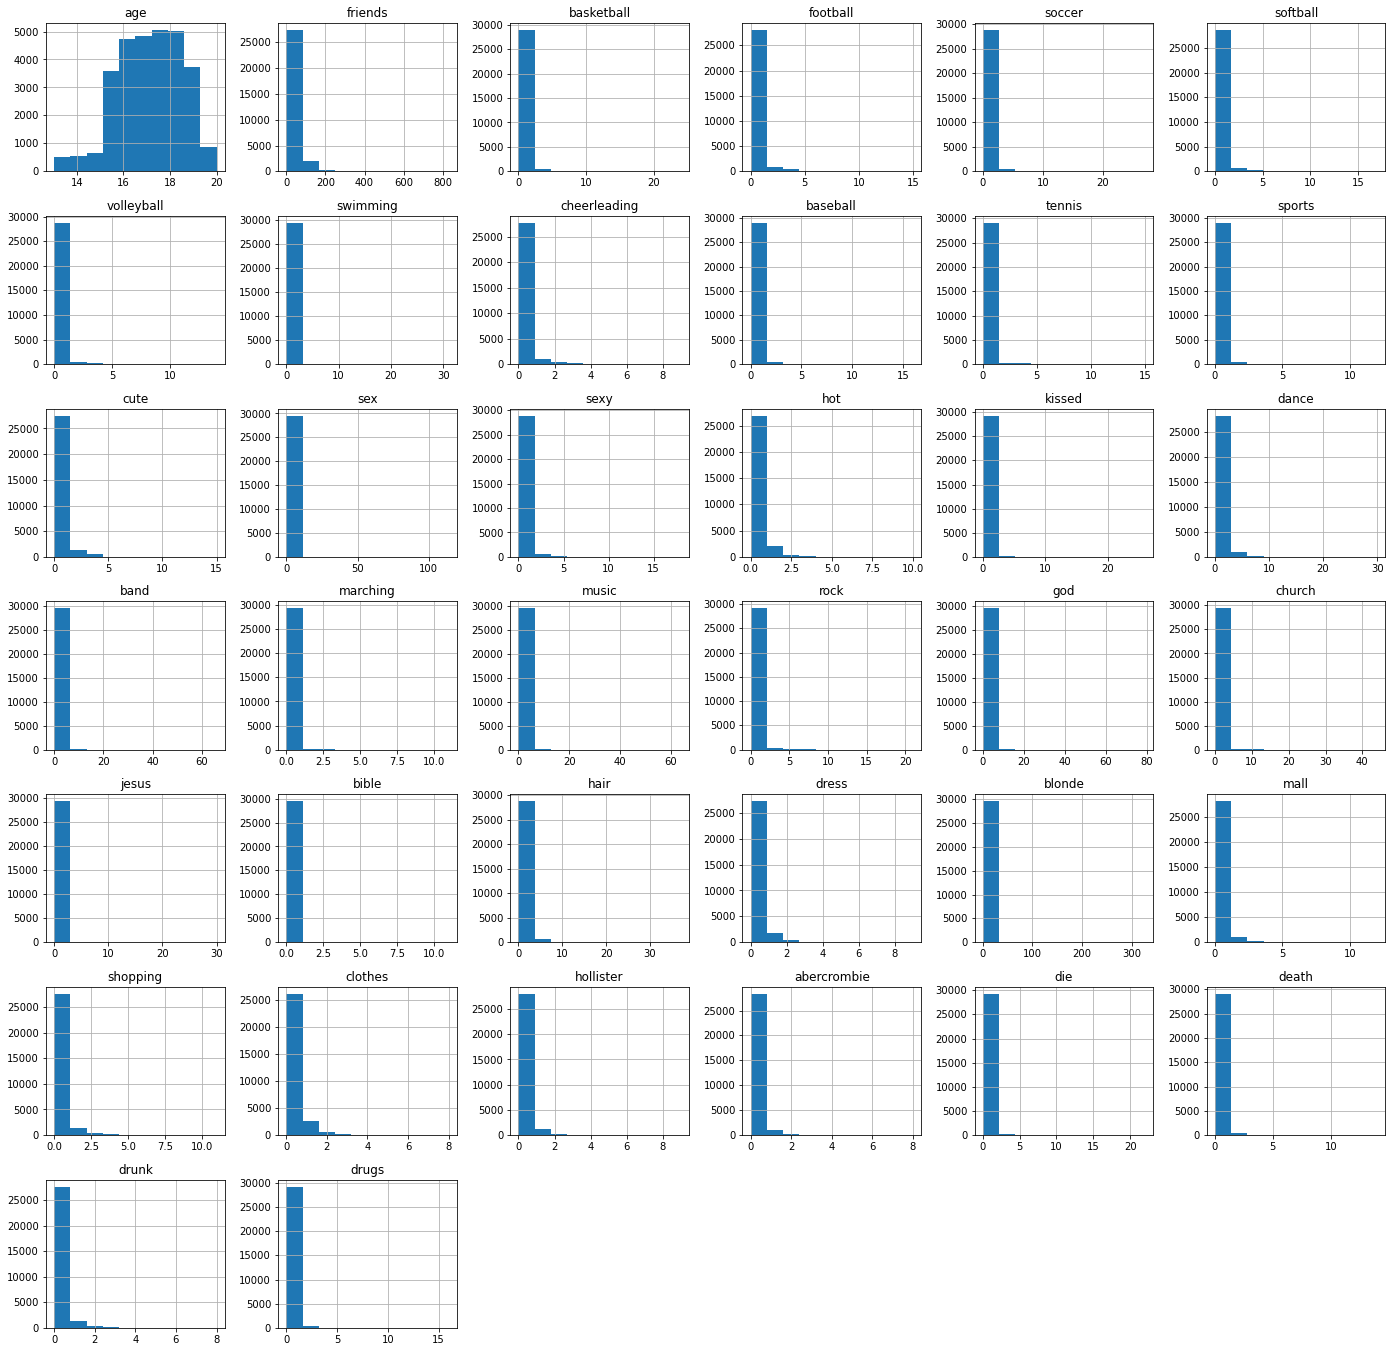

In [26]:
teendata.hist(figsize=(24,24))

In [34]:
teendata = teendata.drop('friends', axis=1)

In [35]:
teendata.columns

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [37]:
eca = ['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports','dance','band', 'marching', 'music','rock']

In [38]:
fashion = ['hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie']
religion = ['god', 'church', 'jesus', 'bible','die',
       'death']
romance = ['cute',
       'sex', 'sexy', 'hot', 'kissed']
asb = ['drunk', 'drugs']

In [39]:
len(eca)

15

In [40]:
len(fashion)

8

In [41]:
len(romance)

5

In [42]:
len(asb)

2

In [43]:
len(religion)

6

In [44]:
teendata_std = teendata.copy()

In [45]:
ss = StandardScaler()


In [46]:
scale = ss.fit_transform(teendata_std.iloc[:,:])

In [47]:
teendata_std.iloc[:,:] =scale

In [48]:
teendata.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [49]:
teendata_std.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,-0.168751,-0.299183,...,-0.050725,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322
1,-0.332775,1.054437,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,-0.168751,-0.299183,...,-0.050725,1.062104,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322
2,-0.332775,1.054437,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,-0.168751,-0.299183,...,-0.050725,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,2.020056,-0.220493,-0.175322
3,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,-0.168751,-0.299183,...,-0.050725,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322
4,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,-0.168751,-0.299183,...,-0.050725,-0.370724,2.262820,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,2.281789,2.733228


In [52]:
def createclusters(data):
    wcss = []
    silhscore = []

    k_list = range(2,11)
    for k in k_list:
        model = KMeans(n_clusters=k).fit(data)
        
        wcss.append(model.inertia_)
        
        cluster = model.fit_predict(data)
        s_score = silhouette_score(data,cluster)
        silhscore.append(s_score)
    return(k_list,wcss,silhscore)
        

In [53]:
lst_cluster,lst_wcss,lst_silhscore = createclusters(teendata_std)

In [55]:
print(lst_cluster)
print(lst_wcss)
print(lst_silhscore)

range(2, 11)
[1008866.6830690587, 979628.0226190328, 950942.6440224976, 924999.8456905282, 900126.4606477717, 879387.5128793854, 866032.4282289096, 842669.7065217608, 827920.4407612779]
[0.4220369460970457, 0.32313637155651337, 0.3250171862622663, 0.30813083024387966, 0.2973570874369788, 0.26950259722321623, 0.2526357119673263, 0.24724486762891276, 0.23991738536449328]


Text(0, 0.5, 'Silhouette Score')

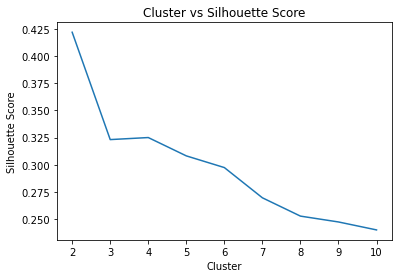

In [56]:
plt.plot(lst_cluster,lst_silhscore)
plt.title("Cluster vs Silhouette Score")
plt.xlabel("Cluster")
plt.ylabel("Silhouette Score")

In [57]:
optk = 2
model = KMeans(n_clusters=optk).fit(teendata_std)
cluster = model.labels_
cluster


array([0, 1, 0, ..., 0, 0, 0])

In [59]:
teendata_std['cluster'] = cluster
teendata_std.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,-0.168751,-0.299183,...,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322,0
1,-0.332775,1.054437,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,-0.168751,-0.299183,...,1.062104,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322,1
2,-0.332775,1.054437,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,-0.168751,-0.299183,...,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,2.020056,-0.220493,-0.175322,0
3,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,-0.168751,-0.299183,...,-0.370724,-0.488959,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,-0.220493,-0.175322,0
4,-0.332775,-0.359146,-0.242711,-0.218757,-0.22398,-0.260105,-0.208203,-0.201758,-0.168751,-0.299183,...,-0.370724,2.262820,-0.315155,-0.20161,-0.183484,-0.294405,-0.261731,2.281789,2.733228,1


In [60]:
teendata_std.cluster.value_counts()

0    25356
1     4207
Name: cluster, dtype: int64

In [63]:
centers = pd.DataFrame(model.cluster_centers_,columns=teendata_std.columns[:-1])

In [64]:
print(centers)

   basketball  football    soccer  softball  volleyball  swimming  \
0   -0.084210 -0.077422 -0.037798 -0.044305   -0.050226 -0.052065   
1    0.506561  0.465724  0.227370  0.266515    0.302133  0.313190   

   cheerleading  baseball    tennis    sports  ...    blonde      mall  \
0     -0.063963 -0.044441 -0.023649 -0.078769  ... -0.025856 -0.129422   
1      0.384763  0.267334  0.142259  0.473828  ...  0.155534  0.778531   

   shopping   clothes  hollister  abercrombie       die     death     drunk  \
0 -0.128554 -0.157873  -0.115140    -0.119274 -0.098468 -0.075580 -0.095720   
1  0.773307  0.949672   0.692617     0.717483  0.592330  0.454644  0.575795   

      drugs  
0 -0.117493  
1  0.706768  

[2 rows x 36 columns]


In [65]:
cluster_data = pd.DataFrame(columns=['cluster','center','feature'])
print(cluster_data)

Empty DataFrame
Columns: [cluster, center, feature]
Index: []


In [78]:
len(np.unique(cluster))

2

In [81]:
# create a dataframe to store the score,feature and group name for each cluster

cluster_data = pd.DataFrame(columns=['cluster','centers','feature'])
print(cluster_data)

for i in range(len(np.unique(cluster))):
    cluster_data = cluster_data.append(pd.DataFrame(zip(list([centers.index[i]])*len(centers.columns), centers.iloc[i,:],centers.columns), 
             columns=['cluster','centers','feature']).sort_values('centers',ascending=False,ignore_index=True))

print(cluster_data)


Empty DataFrame
Columns: [cluster, centers, feature]
Index: []
   cluster   centers   feature
0        0 -0.018456  marching
1        0 -0.023649    tennis
2        0 -0.025856    blonde
3        0 -0.037798    soccer
4        0 -0.038323     bible
..     ...       ...       ...
31       1  0.230528     bible
32       1  0.227370    soccer
33       1  0.155534    blonde
34       1  0.142259    tennis
35       1  0.111020  marching

[72 rows x 3 columns]


In [82]:

cluster_data['category'] = ''

In [83]:
# map each feature in the cluster data with the category
for f in cluster_data.feature.unique():
    if f in eca:
        cat = 'Extra-Curricular'
    elif f in romance:
        cat = 'Romance'
    elif f in religion:
        cat = 'Religion'
    elif f in fashion:
        cat = 'Fashion'
    elif f in asb:
        cat = 'Anti-Social'
    else:
        cat = 'Unknown'
    
    cluster_data.category[cluster_data.feature==f] = cat
    
print(cluster_data)    

<ipython-input-83-ce156515ed7f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.category[cluster_data.feature==f] = cat


   cluster   centers   feature          category
0        0 -0.018456  marching  Extra-Curricular
1        0 -0.023649    tennis  Extra-Curricular
2        0 -0.025856    blonde           Fashion
3        0 -0.037798    soccer  Extra-Curricular
4        0 -0.038323     bible          Religion
..     ...       ...       ...               ...
31       1  0.230528     bible          Religion
32       1  0.227370    soccer  Extra-Curricular
33       1  0.155534    blonde           Fashion
34       1  0.142259    tennis  Extra-Curricular
35       1  0.111020  marching  Extra-Curricular

[72 rows x 4 columns]


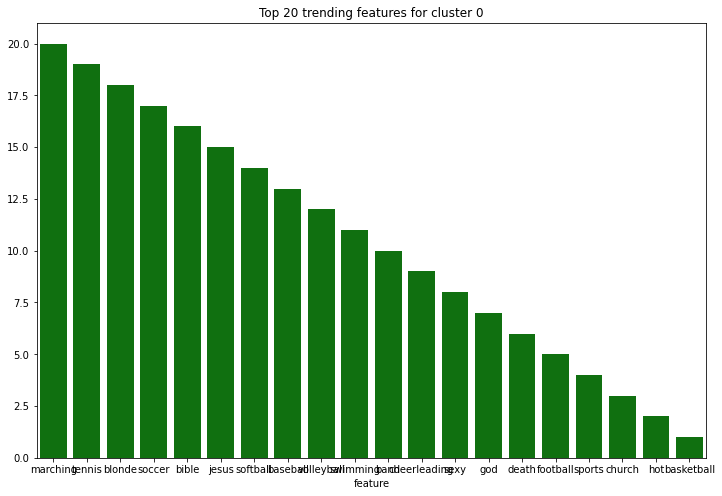

In [88]:
import seaborn as sns

# Analyse the clusters
def plotData(cluster,top=10):
    df = cluster_data[['centers','cluster','feature','category']][cluster_data.cluster==cluster].head(top)
    df = df.set_index('cluster')
    
    # plot the graph
    sns.barplot(x=df.feature,y=list(range(top,0,-1)),color='green')
    plt.title('Top {} trending features for cluster {}'.format(top,cluster))
    
plotData(0,20)

In [87]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8